# WELCOME TO THE YOUTUBE SCRAPER TUTORIAL

In [5]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen, Request
from selenium import webdriver
import pandas as pd
from IPython.display import IFrame, YouTubeVideo
import os

## To List and Change the Theme of the Notebook


In [6]:
! jt -l #to list the theme
! jt -t onedork #to set the theme one dork
! jt -r #to reset the theme

usage: jt [-h] [-l] [-t THEME] [-f MONOFONT] [-fs MONOSIZE] [-nf NBFONT]
          [-nfs NBFONTSIZE] [-tf TCFONT] [-tfs TCFONTSIZE] [-dfs DFFONTSIZE]
          [-ofs OUTFONTSIZE] [-mathfs MATHFONTSIZE] [-m MARGINS]
          [-cursw CURSORWIDTH] [-cursc CURSORCOLOR] [-cellw CELLWIDTH]
          [-lineh LINEHEIGHT] [-altp] [-altmd] [-altout] [-P] [-T] [-N] [-kl]
          [-vim] [-r] [-dfonts]
jt: error: unrecognized arguments: #to list the theme
usage: jt [-h] [-l] [-t THEME] [-f MONOFONT] [-fs MONOSIZE] [-nf NBFONT]
          [-nfs NBFONTSIZE] [-tf TCFONT] [-tfs TCFONTSIZE] [-dfs DFFONTSIZE]
          [-ofs OUTFONTSIZE] [-mathfs MATHFONTSIZE] [-m MARGINS]
          [-cursw CURSORWIDTH] [-cursc CURSORCOLOR] [-cellw CELLWIDTH]
          [-lineh LINEHEIGHT] [-altp] [-altmd] [-altout] [-P] [-T] [-N] [-kl]
          [-vim] [-r] [-dfonts]
jt: error: unrecognized arguments: #to set the theme one dork


^C


In [7]:
def youtube_scraper(inp):
    
    Search = '+'.join(inp.split())
    
    driver = webdriver.Chrome(executable_path=r'C:\Users\jpravijo\Desktop\Anaconda\chromedriver_win32 (1)\chromedriver.exe')
    driver.get('https://www.youtube.com/results?search_query='+Search)
    html = driver.page_source
    soup = BeautifulSoup(html)
    search = soup.find('body', dir='ltr')
    first_content = soup.find('div', id='content')
        
    link,name,channel=[],[],[]
    
    for i,second_content in enumerate (first_content.find_all('div', class_='text-wrapper style-scope ytd-video-renderer')):
        try:

            third_content=second_content.find('h3', class_='title-and-badge style-scope ytd-video-renderer')

            # To get the link of the song
            link.append(('https://www.youtube.com'+(third_content.a)['href']).strip())


            # To get the name of the song
            k=third_content.a.text.strip()
            name.append(k)

            # To get the channel details of the songs
            channel.append(second_content.find('div', class_='hidden style-scope paper-tooltip').text.strip())
            
            if i>10:
                    break

        except:
            pass
    dic={'Name of the Songs': name, 'Channel': channel, 'Links':link}   
    print ('\n')
    print ('\033[1m' + 'These are the top 5 searches from youtube for your search'.center(50))
    driver.close()
    return dic

In [8]:
inp=input('enter the songs to play from youtube : ')
df= pd.DataFrame(youtube_scraper(inp))
df.head()

enter the songs to play from youtube : Alan Walker Faded


These are the top 5 searches from youtube for your search


,Name of the Songs,Channel,Links
0,Alan Walker - Faded,Alan Walker,https://www.youtube.com/watch?v=60ItHLz5WEA
1,Alan Walker - Faded (Live Performance),Alan Walker,https://www.youtube.com/watch?v=mIxlvVlOIS0
2,Alan Walker - Faded (Lyrics),7clouds,https://www.youtube.com/watch?v=qdpXxGPqW-Y
3,ALAN WALKER – Faded / Different World feat. Ju...,KKBOX,https://www.youtube.com/watch?v=n03IDJcsy5g
4,Alan Walker - Fade [NCS Release],NoCopyrightSounds,https://www.youtube.com/watch?v=bM7SZ5SBzyY


## To save the dataframe into HDF Format and CSV format

In [9]:
hdf=pd.HDFStore(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.h5');
hdf.put(inp,df,format='table', data_columns=True);
df.to_csv(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.csv',mode='a')

C:\Users\jpravijo\Anaconda3\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Alan Walker Faded'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\jpravijo\Anaconda3\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Name of the Songs'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\jpravijo\Anaconda3\lib\site-packages\tables\attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: 'Name of the Songs_kind'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; usin

## Choose the Scraped data to play the songs

please select the songs by choosing the indexes (e.g) 0,1,2,3,4
0


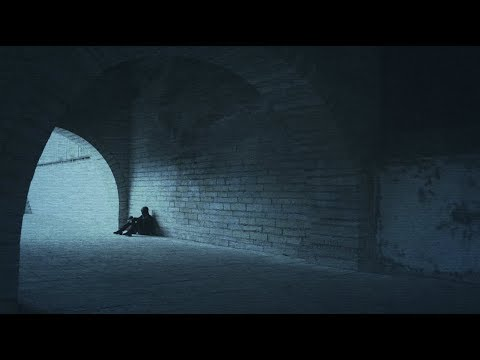

In [10]:
print('\033[1m'+"please select the songs by choosing the indexes (e.g) 0,1,2,3,4")
song_input=int(input())
YouTubeVideo(df.loc[song_input, 'Links'].split('=')[1], width=800, height=600)

## To Open the CSV which contains the Dataframe

In [11]:
os.startfile(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.csv')

## To Open the HDF which contains the Dataframe

In [12]:
hdf=pd.HDFStore(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.h5')
hdf.keys()

['/Alan Walker Faded',
 '/dusk to dawn',
 '/dusk to dawn song',
 '/martin garrix ',
 '/martin garrix top 5 songs',
 '/martin garrix top songs',
 '/matin garrix animals songs',
 '/rowdy baby songs',
 '/sia cheap trills']

In [13]:
hdf.get('/matin garrix animals songs')

,Name of the Songs,Channel,Links
0,Martin Garrix - Animals (Official Video),Spinnin' Records,https://www.youtube.com/watch?v=gCYcHz2k5x0
1,Martin Garrix - Animals (Original Mix),Spinnin' Records,https://www.youtube.com/watch?v=DuFUtL8zUAk
2,Martin Garrix - Animals (Bass Boosted),BASS BOOSTED SONGS,https://www.youtube.com/watch?v=eIpLAwON_R4
3,Martin Garrix ANIMALS LIVE TOMORROWLAND 2016,G Ru,https://www.youtube.com/watch?v=NcK8Zyzg5eA
